<a href="https://colab.research.google.com/github/RoiLe/AI-picture-recognition/blob/main/demo_AI_img_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# installation

In [ ]:
pip install opendatasets

In [ ]:
pip install pandas

# import

In [ ]:
import opendatasets as od
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
import os



# get and show data

In [ ]:
od.download("https://www.kaggle.com/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: roilevi12
Your Kaggle Key: ··········


100%|██████████| 105M/105M [00:03<00:00, 28.0MB/s]


In [ ]:
# reading the XLSX file
fake_folder =('/content/cifake-real-and-ai-generated-synthetic-images/test/FAKE')

images_path = []
for filename in os.listdir(fake_folder):
  img = os.path.join(fake_folder,filename)
  if img is not None:
      images_path.append(img)


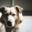

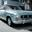

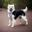

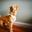

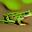

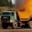

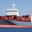

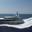

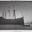

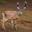

In [ ]:
for i in range(10):
    image = cv2.imread(images_path[i])

    # Check if the image was loaded successfully
    if image is not None:
        # Displaying the image
        cv2_imshow(image)
    else:
        print(f"Error loading image {images_path[i]}")



# model


In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.12.0'

In [ ]:
train_datagen = ImageDataGenerator(
                                    width_shift_range = 0.3,
                                    height_shift_range = 0.3,
                                    brightness_range = (0.2, 1.4),
                                    rotation_range = 20,
                                    rescale = 1./255,
                                    zoom_range = [0.5, 1.5],
                                    channel_shift_range=150.0,
                                    horizontal_flip = True
                                   )
training_set = train_datagen.flow_from_directory('/content/cifake-real-and-ai-generated-synthetic-images/train/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 100000 images belonging to 2 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val_set = val_datagen.flow_from_directory('/content/cifake-real-and-ai-generated-synthetic-images/test/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 20000 images belonging to 2 classes.


In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=2, activation='sigmoid'))

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.fit(x = training_set, validation_data = val_set, epochs = 10)

Epoch 1/10
3125/3125 [==============================] - 821s 263ms/step - loss: 0.6351 - accuracy: 0.6343 - val_loss: 0.4979 - val_accuracy: 0.7754
Epoch 2/10
3125/3125 [==============================] - 823s 263ms/step - loss: 0.5779 - accuracy: 0.6964 - val_loss: 0.3968 - val_accuracy: 0.8378
Epoch 3/10
3125/3125 [==============================] - 808s 259ms/step - loss: 0.5458 - accuracy: 0.7218 - val_loss: 0.3555 - val_accuracy: 0.8487
Epoch 4/10
3125/3125 [==============================] - 803s 257ms/step - loss: 0.5221 - accuracy: 0.7394 - val_loss: 0.3741 - val_accuracy: 0.8358
Epoch 5/10
3125/3125 [==============================] - 801s 256ms/step - loss: 0.5052 - accuracy: 0.7515 - val_loss: 0.3145 - val_accuracy: 0.8742
Epoch 6/10
3125/3125 [==============================] - 797s 255ms/step - loss: 0.4933 - accuracy: 0.7605 - val_loss: 0.2900 - val_accuracy: 0.8791
Epoch 7/10
3125/3125 [==============================] - 798s 255ms/step - loss: 0.4790 - accuracy: 0.7697 - val_

In [ ]:
training_set.class_indices

{'FAKE': 0, 'REAL': 1}

In [ ]:
cnn.save('demo_cnn_model_version_3.h5')

In [ ]:
model = tf.keras.models.load_model('demo_cnn_model_version_3.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [ ]:
import numpy as np


# predict 10 images in every clsass

In [ ]:
# reading the XLSX file
FAKE_TEST_folder =('/content/cifake-real-and-ai-generated-synthetic-images/test/FAKE')
REAL_TEST_folder =('/content/cifake-real-and-ai-generated-synthetic-images/test/REAL')

fake_test_images_path = []
real_test_images_path = []

for fakefilename in os.listdir(FAKE_TEST_folder):
  fake_img = os.path.join(FAKE_TEST_folder,fakefilename)
  if fake_img is not None:
      fake_test_images_path.append(fake_img)

for realfilename in os.listdir(REAL_TEST_folder):
  real_img = os.path.join(REAL_TEST_folder,realfilename)
  if real_img is not None:
      real_test_images_path.append(real_img)


1/1 [==============================] - 0s 104ms/step
[[1. 0.]]


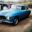

1/1 [==============================] - 0s 18ms/step
[[1. 0.]]


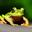

1/1 [==============================] - 0s 18ms/step
[[1. 0.]]


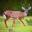

1/1 [==============================] - 0s 19ms/step
[[1. 0.]]


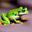

1/1 [==============================] - 0s 18ms/step
[[1. 0.]]


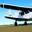

1/1 [==============================] - 0s 26ms/step
[[1. 0.]]


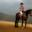

1/1 [==============================] - 0s 21ms/step
[[1. 0.]]


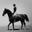

1/1 [==============================] - 0s 20ms/step
[[1. 0.]]


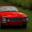

1/1 [==============================] - 0s 18ms/step
[[1. 0.]]


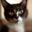

1/1 [==============================] - 0s 19ms/step
[[1. 0.]]


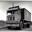

In [ ]:
for i in range(10):
    image = cv2.imread(fake_test_images_path[i])
    test_image = tf.keras.utils.load_img(fake_test_images_path[i], target_size = (64, 64))
    test_image = tf.keras.utils.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    print(result)
    # Check if the image was loaded successfully
    if image is not None:
        # Displaying the image
        cv2_imshow(image)
    else:
        print(f"Error loading image {images_path[i]}")


1/1 [==============================] - 0s 183ms/step
[[1. 0.]]


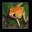

1/1 [==============================] - 0s 29ms/step
[[1. 0.]]


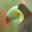

1/1 [==============================] - 0s 31ms/step
[[4.273443e-29 1.000000e+00]]


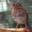

1/1 [==============================] - 0s 27ms/step
[[0. 1.]]


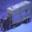

1/1 [==============================] - 0s 30ms/step
[[1.000000e+00 3.462419e-20]]


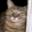

1/1 [==============================] - 0s 29ms/step
[[9.9990821e-01 1.0222096e-04]]


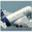

1/1 [==============================] - 0s 26ms/step
[[1. 0.]]


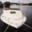

1/1 [==============================] - 0s 26ms/step
[[0. 1.]]


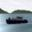

1/1 [==============================] - 0s 28ms/step
[[0.80570924 0.20735458]]


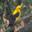

1/1 [==============================] - 0s 25ms/step
[[0.5217072  0.47782564]]


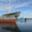

In [ ]:
for j in range(10):
    image = cv2.imread(real_test_images_path[j])
    test_image = tf.keras.utils.load_img(real_test_images_path[j], target_size = (64, 64))
    test_image = tf.keras.utils.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    print(result)
    # Check if the image was loaded successfully
    if image is not None:
        # Displaying the image
        cv2_imshow(image)
    else:
        print(f"Error loading image {images_path[j]}")